# MITRE + OWASP Threat Modelling

In this demo, we will use a graph build from MITRE and OWASP data sources to create a list of security requirements ([OWASP ASVS](https://owasp.org/www-project-application-security-verification-standard/)) based on the consequences ([MITRE CAPEC](https://capec.mitre.org/)) we want to avoid.

To run this demo, you need to build the graph, in this repo there is a 'source' folder, in here are three data routines to be run in order:
- 01 acquire_rawdata.py
- 02 process_rawdata.py
- 03 build_graph.py

These download, transform and build into a grpah.

In [13]:
# import libraries we will use
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import mitretools as mt

In [15]:
# load the precompiled graph (you will need to build this)
graph = nx.read_graphml(r'data/processed/mitre-data.graphml')
print('nodes:', len(graph.nodes()))
print('edges:', len(graph.edges()))

nodes: 3063
edges: 9896


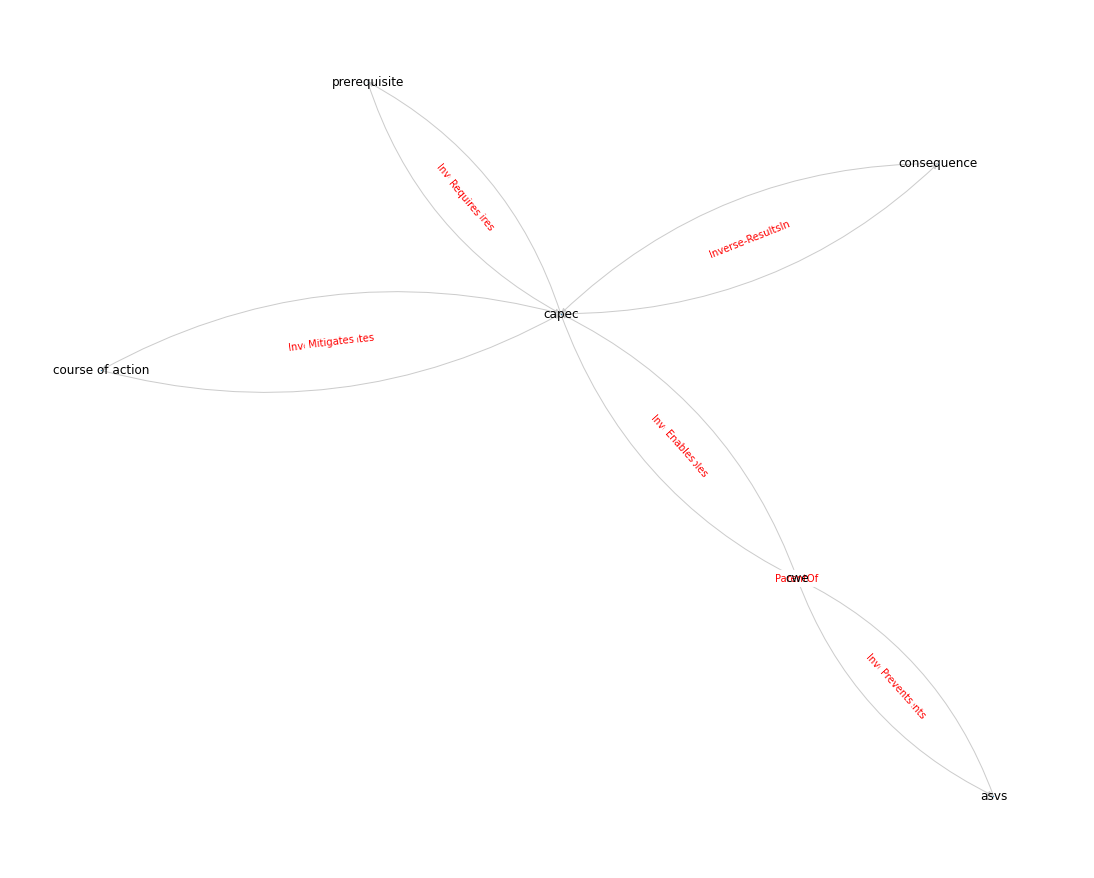

In [16]:
# simplify and draw the node and edge types    
s = mt.simplify_graph(graph)
mt.show_graph(s)

In [17]:
# list all of the potential consequences
mt.list_nodes(graph, ['consequence'], ['group', 'label'], occurances=True)

{'Confidentiality, Gain Privileges': None,
 'Access_Control, Gain Privileges': None,
 'Authorization, Gain Privileges': None,
 'Availability, Unreliable Execution': None,
 'Availability, Execute Unauthorized Commands': None,
 'Confidentiality, Execute Unauthorized Commands': None,
 'Confidentiality, Read Data': None,
 'Integrity, Execute Unauthorized Commands': None,
 'Integrity, Modify Data': None,
 'Confidentiality, Modify Data': None,
 'Availability, Resource Consumption': None,
 'Confidentiality, Bypass Protection Mechanism': None,
 'Access_Control, Bypass Protection Mechanism': None,
 'Authorization, Bypass Protection Mechanism': None,
 'Confidentiality, Other': None,
 'Authorization, Execute Unauthorized Commands': None,
 'Accountability, Gain Privileges': None,
 'Authentication, Gain Privileges': None,
 'Non-Repudiation, Gain Privileges': None,
 'Integrity, Gain Privileges': None,
 'Integrity, Other': None,
 'Availability, Other': None,
 'Access_Control, Execute Unauthorized Com

In [30]:
# For this example, we're interested in preventing Authorization issues by Bypassing Protection Mechanisms
# To filter the tree, we set the starting node (label = 'Bypass Protection Mechanism' & group = 'Authorization'),
#    we limit the relationships we will follow, and we set any additional filters... in this case we only want
#    to pass through 'capec' nodes where the likelihood_of_attack is 'High'

n = mt.filter_graph(graph, 
                 { 
                     'label': ['Bypass Protection Mechanism'], 
                     'group': ['Authorization'] 
                 }, 
                 { 'relationship': ['Inverse-ResultsIn',
                                    #'ResultsIn', 
                                    'Inverse-Enables', 
                                    #'Enables', 
                                    #'Inverse-Requires',
                                    #'Requires',
                                    'Inverse-Prevents',
                                    #'Prevents',
                                    'Inverse-Mitigates',
                                    #'Mitigates',
                                     ''
                                   ] },
                { 'capec' : { 'likelihood_of_attack': 'High' } })

In [33]:
mt.list_nodes(n, ['capec'], ['label', 'description'], occurances=True)

{'CAPEC-575, Account Footprinting': 1,
 'CAPEC-297, TCP ACK Ping': 1,
 'CAPEC-574, Services Footprinting': 1,
 "CAPEC-328, TCP 'RST' Flag Checksum Probe": 1,
 'CAPEC-306, TCP Window Scan': 1,
 'CAPEC-237, Escaping a Sandbox by Calling Signed Code in Another Language': 1,
 'CAPEC-299, TCP SYN Ping': 1,
 'CAPEC-326, TCP Initial Window Size Probe': 1,
 'CAPEC-307, TCP RPC Scan': 1,
 'CAPEC-327, TCP Options Probe': 1,
 'CAPEC-207, Removing Important Client Functionality': 1,
 'CAPEC-577, Owner Footprinting': 1,
 'CAPEC-178, Cross-Site Flashing': 1,
 'CAPEC-331, ICMP IP Total Length Field Probe': 1,
 'CAPEC-96, Block Access to Libraries': 1,
 'CAPEC-302, TCP FIN Scan': 1,
 'CAPEC-576, Group Permission Footprinting': 1,
 'CAPEC-196, Session Credential Falsification through Forging': 1,
 'CAPEC-310, Scanning for Vulnerable Software': 1,
 'CAPEC-480, Escaping Virtualization': 1,
 'CAPEC-324, TCP (ISN) Sequence Predictability Probe': 1,
 "CAPEC-319, IP (DF) 'Don't Fragment Bit' Echoing Probe": 

In [29]:
mt.list_nodes(n, ['course of action'], ['description'], occurances=True)

{'Leverage stateful firewalls that allow for the rejection of a packet that is not part of an existing connection.': 1,
 'Design: Use obfuscation and other techniques to prevent reverse engineering the standard libraries.': 1,
 'Configuration: Properly configure the crossdomain.xml file to only include the known domains that should host remote flash movies.': 1,
 'Ensure that proper permissions on files and folders are enacted to limit accessibility.': 1,
 'Design: Check for the existence of files to be created, if in existence verify they are neither symlinks nor hard links before opening them.': 1,
 'Implementation: Only allow known URL to be included as remote flash movies in a flash application': 1,
 'Identify programs that may be used to acquire service information and block them by using a software restriction policy or tools that restrict program execution by process whitelisting.': 1,
 'Ensure that filtering or input validation is applied to canonical data.': 1,
 'Configure you

In [24]:
mt.list_nodes(n, ['asvs'], ['label', 'section_name', 'description'], occurances=True)

{'ASVS-14.4.3, Config, Verify that a content security policy (CSPv2) is in place that helps mitigate impact for XSS attacks like HTML, DOM, JSON, and JavaScript injection vulnerabilities.': 1,
 'ASVS-13.2.2, API, Verify that JSON schema validation is in place and verified before accepting input.': 1,
 'ASVS-14.3.3, Config, Verify that the HTTP headers or any part of the HTTP response do not expose detailed version information of system components.': 1,
 'ASVS-13.3.1, API, Verify that XSD schema validation takes place to ensure a properly formed XML document, followed by validation of each input field before any processing of that data takes place.': 1,
 'ASVS-5.1.4, Validation, Verify that structured data is strongly typed and validated against a defined schema including allowed characters, length and pattern (e.g. credit card numbers or telephone, or validating that two related fields are reasonable, such as checking that suburb and zip/postcode match). ([C5](https://www.owasp.org/ind

In [25]:
mt.list_nodes(n, ['cwe'], ['label', 'name'])

{'CWE-200, Exposure of Sensitive Information to an Unauthorized Actor': 1,
 'CWE-172, Encoding Error': 1,
 'CWE-180, Incorrect Behavior Order: Validate Before Canonicalize': 1,
 'CWE-183, Permissive List of Allowed Inputs': 1,
 'CWE-697, Incorrect Comparison': 1,
 'CWE-664, Improper Control of a Resource Through its Lifetime': 1,
 'CWE-589, Call to Non-ubiquitous API': 1,
 'CWE-602, Client-Side Enforcement of Server-Side Security': 1,
 'CWE-20, Improper Input Validation': 1,
 'CWE-184, Incomplete List of Disallowed Inputs': 1,
 'CWE-173, Improper Handling of Alternate Encoding': 1,
 "CWE-59, Improper Link Resolution Before File Access ('Link Following')": 1,
 'CWE-384, Session Fixation': 1,
 "CWE-74, Improper Neutralization of Special Elements in Output Used by a Downstream Component ('Injection')": 1,
 'CWE-1021, Improper Restriction of Rendered UI Layers or Frames': 1,
 'CWE-176, Improper Handling of Unicode Encoding': 1,
 'CWE-179, Incorrect Behavior Order: Early Validation': 1,
 'C

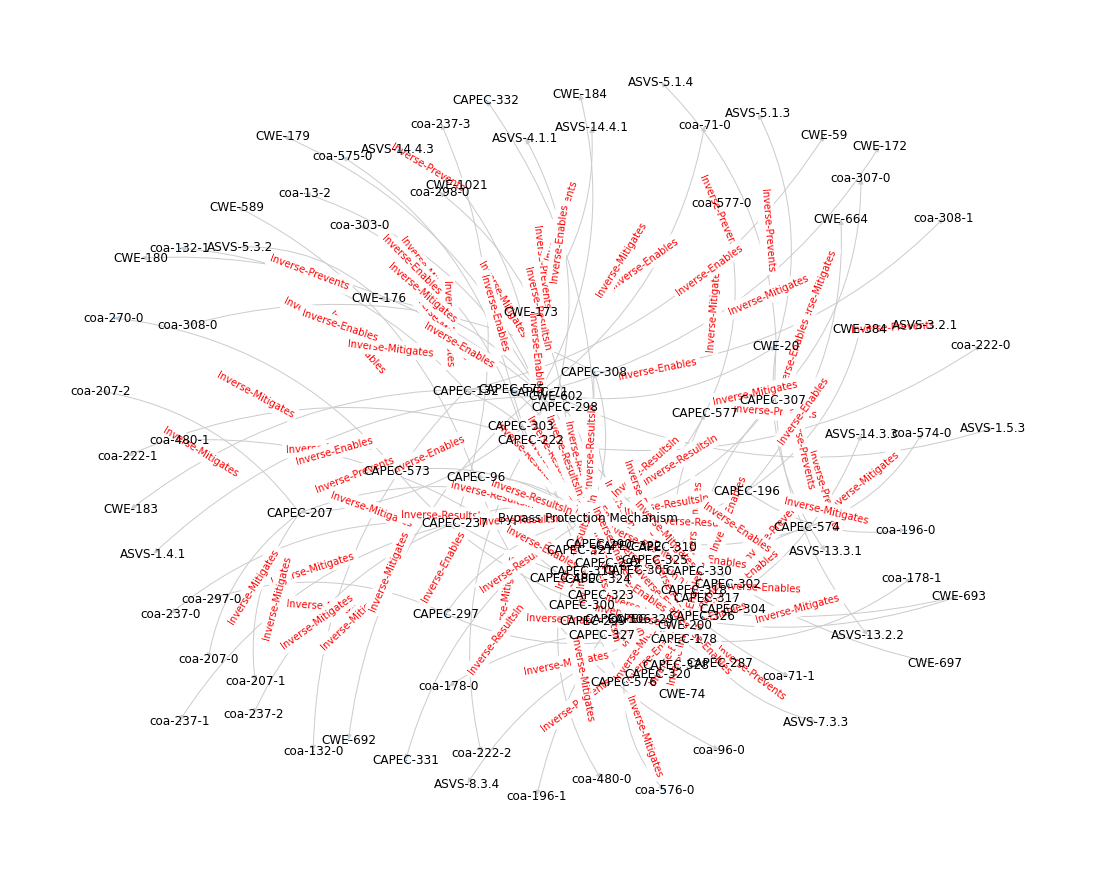

In [35]:
mt.show_graph(n)

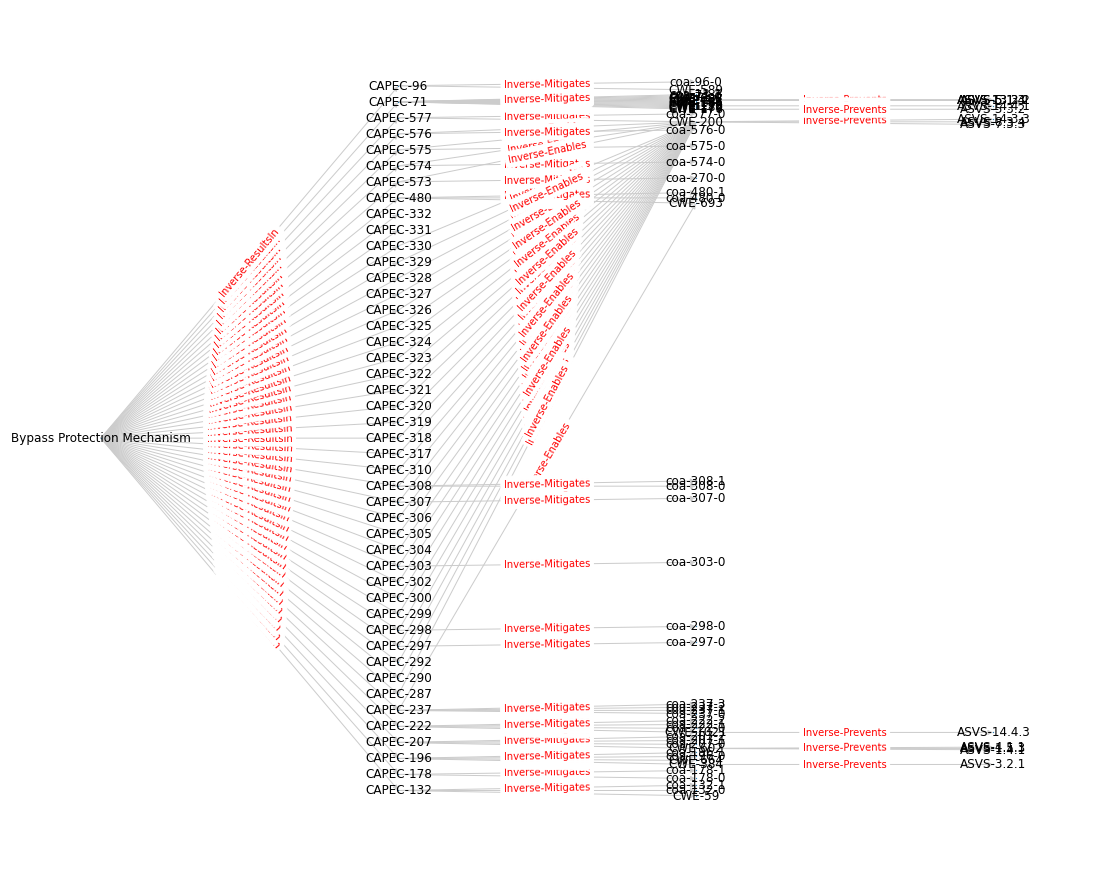

In [34]:
mt.show_tree(n)